# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Irfan Nur Fahrudin
- **Email:** irfan.nurfahrudin@gmail.com
- **ID Dicoding:** inurart

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap tingkat polusi udara di ketiga lokasi?

- Bagaimana hubungan antara parameter cuaca (kelembaban, suhu, dan kecepatan angin) dengan tingkat polusi udara?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# Mengumpulkan data dari CSV
huairou_df = pd.read_csv("/content/data/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("/content/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
wanliu_df = pd.read_csv("/content/data/PRSA_Data_Wanliu_20130301-20170228.csv")

# Tampilkan beberapa baris awal
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [3]:
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [4]:
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


**Insight:**
- Memastikan file CSV sudah diunggah di /content/data
- Melihat beberapa baris awal pada data

### Assessing Data

Menilai tabel `huairou_df`

In [5]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
huairou_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


In [8]:
print("Jumlah duplikasi: ", huairou_df.duplicated().sum())


Jumlah duplikasi:  0


In [10]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


Menilai tabel `nongzhanguan_df`

In [11]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [12]:
nongzhanguan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206


In [13]:
print("Jumlah duplikasi: ", nongzhanguan_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Menilai tabel `wanliu_df`

In [15]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [16]:
wanliu_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812


In [17]:
print("Jumlah duplikasi: ", wanliu_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


**Insight:**
- pada ketiga dataframe tidak terdapat data duplikasi, namun terdapat beberapa kolom yang missing value.


### Cleaning Data

Membersihkan tabel `huairou_df` `nongzhanguan_df` `wanliu_df`

In [20]:
print("Jumlah data huairou_df: ",len(huairou_df))
print("Jumlah data nongzhanguan_df: ",len(nongzhanguan_df))
print("Jumlah data wanliu_df: ",len(wanliu_df))

Jumlah data huairou_df:  35064
Jumlah data nongzhanguan_df:  35064
Jumlah data wanliu_df:  35064


Karena jumlah missing value terbanyak 2107 dari total data 35064. Maka saya akan melakukan interpolasi linier di beberapa data dan mengisi kolom arah angin(wd) dengan modus pada kolom arah angin(wd)

In [21]:
# Fungsi cleaning data
def clean_air_quality(df):
    # Mengisi nilai numerik yang hilang dengan interpolasi linier
    num_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
    df[num_cols] = df[num_cols].interpolate(method='linear')

    # Mengisi kategori arah angin dengan modus
    df['wd'].fillna(df['wd'].mode()[0], inplace=True)

    # Menghapus baris yang masih memiliki NaN setelah interpolasi (jika ada)
    df.dropna(inplace=True)

    return df


# Membersihkan setiap dataset
huairou_df = clean_air_quality(huairou_df)
nongzhanguan_df = clean_air_quality(nongzhanguan_df)
wanliu_df = clean_air_quality(wanliu_df)


<ipython-input-21-31f470431d4e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].fillna(df['wd'].mode()[0], inplace=True)
<ipython-input-21-31f470431d4e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

Cek kembali jumlah missing values `huairou_df`


In [22]:
huairou_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


Cek kembali jumlah missing values `nongzhanguan_df`


In [23]:
nongzhanguan_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


Cek kembali jumlah missing values `wanliu_df`


In [24]:
wanliu_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Mengisi nilai hilang pada kolom numerik (PM2.5, PM10, SO2, dll.) dengan metode interpolasi linier, yang mempertahankan tren data.
- Kolom arah angin (wd) diisi dengan modus (nilai yang paling sering muncul) untuk menjaga konsistensi data karena rata-rata data yang kosong 78-302 data dari 35064 data
- Menghapus baris yang masih memiliki NaN setelah interpolasi, memastikan dataset siap untuk analisis tanpa nilai kosong.

## Exploratory Data Analysis (EDA)

### Explore ...

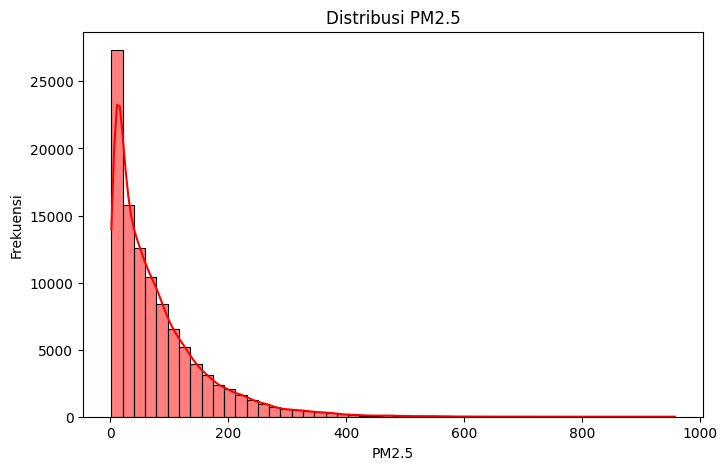

In [30]:
# Histogram distribusi PM2.5
plt.figure(figsize=(8, 5))
sns.histplot(df["PM2.5"], bins=50, kde=True, color="red")
plt.title("Distribusi PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frekuensi")
plt.show()

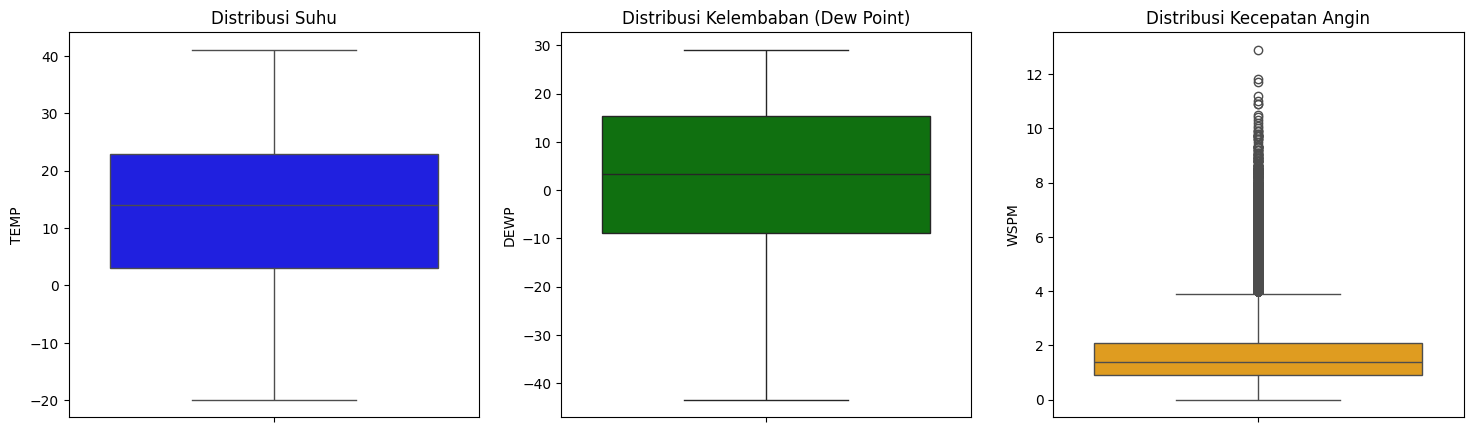

In [31]:
# Boxplot untuk melihat sebaran suhu, kelembaban, dan kecepatan angin
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df["TEMP"], ax=axes[0], color="blue")
axes[0].set_title("Distribusi Suhu")

sns.boxplot(y=df["DEWP"], ax=axes[1], color="green")
axes[1].set_title("Distribusi Kelembaban (Dew Point)")

sns.boxplot(y=df["WSPM"], ax=axes[2], color="orange")
axes[2].set_title("Distribusi Kecepatan Angin")

plt.show()

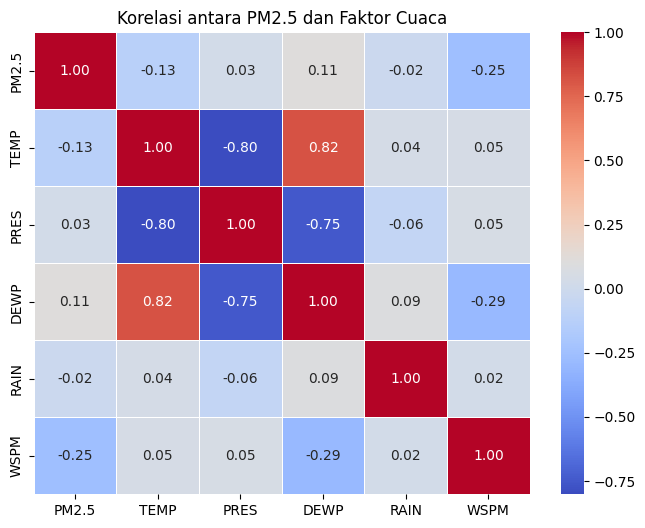

In [33]:
# Korelasi antara PM2.5 dan faktor cuaca
weather_corr = df[["PM2.5", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(weather_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi antara PM2.5 dan Faktor Cuaca")
plt.show()

**Insight:**
1. Distribusi PM2.5
  - Distribusi PM2.5 memiliki pola yang sangat miring ke kanan (right-skewed), menunjukkan bahwa sebagian besar nilai PM2.5 rendah, tetapi ada beberapa kejadian polusi udara yang sangat tinggi.
  - Nilai PM2.5 yang tinggi menunjukkan bahwa beberapa waktu atau kondisi tertentu menyebabkan lonjakan polusi udara yang signifikan.
  - Mayoritas data berada dalam rentang rendah (di bawah 200), tetapi ada beberapa dengan nilai ekstrem.

2. Boxplot Suhu, Kelembaban (Dew Point), dan Kecepatan Angin
  - Suhu (TEMP): Distribusi suhu menunjukkan rentang -20°C hingga lebih dari 40°C. Sebagian besar data berada dalam kisaran 0°C hingga 30°C.
  - Kelembaban (DEWP): Nilai kelembaban (dew point) bervariasi dari sekitar -40 hingga 30, dengan median mendekati 0.
  - Kecepatan Angin (WSPM): Distribusi kecepatan angin menunjukkan banyak outlier di atas 4 m/s, menunjukkan adanya beberapa kondisi angin yang sangat tinggi.

3. Korelasi antara PM2.5 dan Faktor Cuaca
  - Hubungan dengan Suhu (TEMP) (-0.13): Korelasi negatif lemah antara PM2.5 dan suhu menunjukkan bahwa ketika suhu meningkat, konsentrasi PM2.5 cenderung sedikit menurun, tetapi hubungan ini tidak kuat.
  - Hubungan dengan Kelembaban (DEWP) (0.11): Korelasi positif lemah menunjukkan bahwa ketika kelembaban meningkat, PM2.5 juga sedikit meningkat.
  - Hubungan dengan Kecepatan Angin (WSPM) (-0.25): Korelasi negatif moderat menunjukkan bahwa semakin tinggi kecepatan angin, semakin rendah tingkat polusi udara. Ini masuk akal karena angin yang lebih kuat dapat menyebarkan polutan dan mengurangi konsentrasi PM2.5.
  - Hubungan dengan Tekanan Udara (PRES) (0.03) dan Hujan (RAIN) (-0.02):** Korelasi sangat lemah, menunjukkan bahwa faktor-faktor ini tidak memiliki pengaruh signifikan terhadap PM2.5 dalam dataset ini.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap tingkat polusi udara di ketiga lokasi?

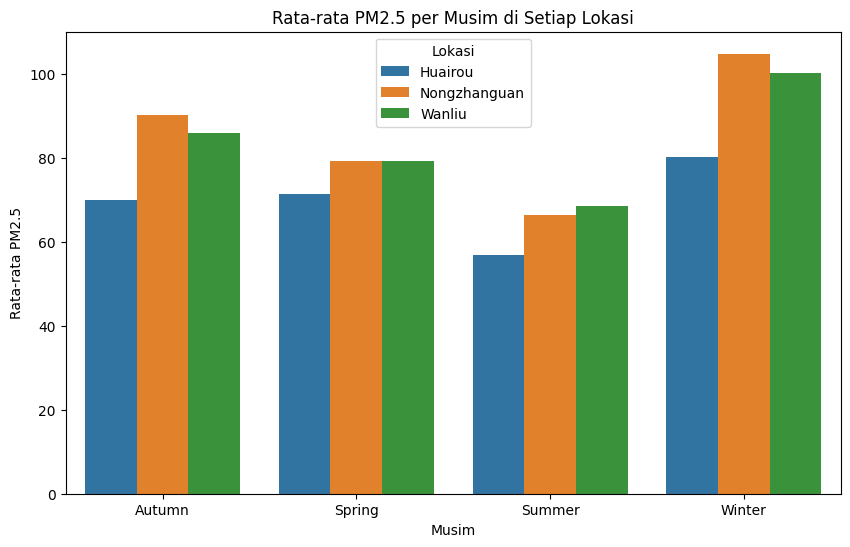

In [47]:
# Tambahkan kolom lokasi
huairou_df["location"] = "Huairou"
nongzhanguan_df["location"] = "Nongzhanguan"
wanliu_df["location"] = "Wanliu"

# Gabungkan data dari tiga lokasi
df = pd.concat([huairou_df, nongzhanguan_df, wanliu_df], ignore_index=True)

# Konversi ke format datetime
df["date"] = pd.to_datetime(df[["year", "month", "day"]])

# Menentukan musim berdasarkan bulan
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["month"].apply(get_season)

# Aggregasi rata-rata PM2.5 per musim dan lokasi
seasonal_pm25 = df.groupby(["season", "location"])["PM2.5"].agg(["mean", "median", "max", "min"]).reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="mean", hue="location", data=seasonal_pm25)
plt.title("Rata-rata PM2.5 per Musim di Setiap Lokasi")
plt.xlabel("Musim")
plt.ylabel("Rata-rata PM2.5")
plt.legend(title="Lokasi")
plt.show()


### Pertanyaan 2: Bagaimana hubungan antara parameter cuaca (kelembaban, suhu, dan kecepatan angin) dengan tingkat polusi udara?

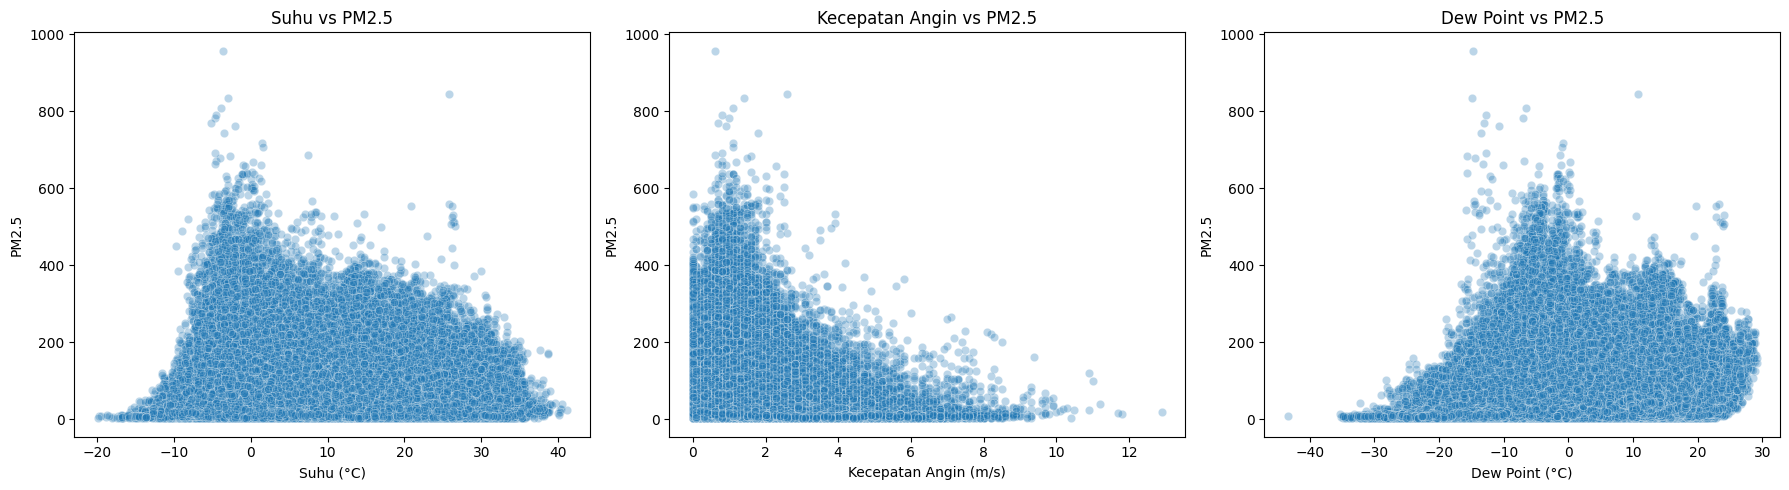

In [34]:
# Scatter plot hubungan antara PM2.5 dan faktor cuaca
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x="TEMP", y="PM2.5", alpha=0.3, ax=axes[0])
axes[0].set_title("Suhu vs PM2.5")
axes[0].set_xlabel("Suhu (°C)")
axes[0].set_ylabel("PM2.5")

sns.scatterplot(data=df, x="WSPM", y="PM2.5", alpha=0.3, ax=axes[1])
axes[1].set_title("Kecepatan Angin vs PM2.5")
axes[1].set_xlabel("Kecepatan Angin (m/s)")
axes[1].set_ylabel("PM2.5")

sns.scatterplot(data=df, x="DEWP", y="PM2.5", alpha=0.3, ax=axes[2])
axes[2].set_title("Dew Point vs PM2.5")
axes[2].set_xlabel("Dew Point (°C)")
axes[2].set_ylabel("PM2.5")

plt.tight_layout()
plt.show()


**Insight:**
1. Dari Histogram Rata-rata PM2.5 per Musim di Setiap Lokasi

  - Polusi tertinggi terjadi di musim dingin (Winter) di semua lokasi, dengan Nongzhanguan dan Wanliu memiliki tingkat PM2.5 yang lebih tinggi dibanding Huairou.

  - Musim panas (Summer) memiliki tingkat PM2.5 terendah, menunjukkan udara lebih bersih di musim ini.

  - Nongzhanguan dan Wanliu umumnya memiliki tingkat polusi lebih tinggi dibandingkan Huairou di semua musim.

2. Dari scatterplot hubungan antara PM2.5 dan faktor cuaca
  - Suhu (TEMP) memiliki korelasi negatif dengan PM2.5

    Saat suhu meningkat, tingkat PM2.5 cenderung menurun. Hal ini bisa disebabkan oleh peningkatan konveksi udara saat panas, yang membantu menyebarkan polusi.

  - Kecepatan Angin (WSPM) memiliki korelasi negatif dengan PM2.5
    
    Angin yang lebih kuat membantu mengurangi konsentrasi polusi dengan menyebarkan partikel ke atmosfer yang lebih luas.

  - Kelembaban (DEWP) memiliki korelasi positif dengan PM2.5
    
    Udara yang lebih lembap meningkatkan kondensasi partikel polutan, menyebabkan akumulasi polusi lebih tinggi.

## Analisis Lanjutan (Opsional)

Pada analisis lanjutan saya melakukan clustering / mengelompokkan tingkat polusi udara

Data PM2.5 dikategorikan berdasarkan standar kualitas udara dengan rentang:
1. Baik: PM2.5 ≤ 50
2. Sedang: 51 ≤ PM2.5 ≤ 100
3. Tidak Sehat (Sensitif): 101 ≤ PM2.5 ≤ 150
4. Tidak Sehat: 151 ≤ PM2.5 ≤ 200
5. Sangat Tidak Sehat: 201 ≤ PM2.5 ≤ 300
6. Berbahaya: PM2.5 > 300


PM2.5_Category   Baik  Sedang  Tidak Sehat (Sensitif)  Tidak Sehat  \
location                                                             
Huairou         18421    8201                    4296         2019   
Nongzhanguan    15831    8660                    4622         2517   
Wanliu          15751    8745                    4852         2579   

PM2.5_Category  Sangat Tidak Sehat  Berbahaya  
location                                       
Huairou                       1646        481  
Nongzhanguan                  2279       1155  
Wanliu                        2186        951  


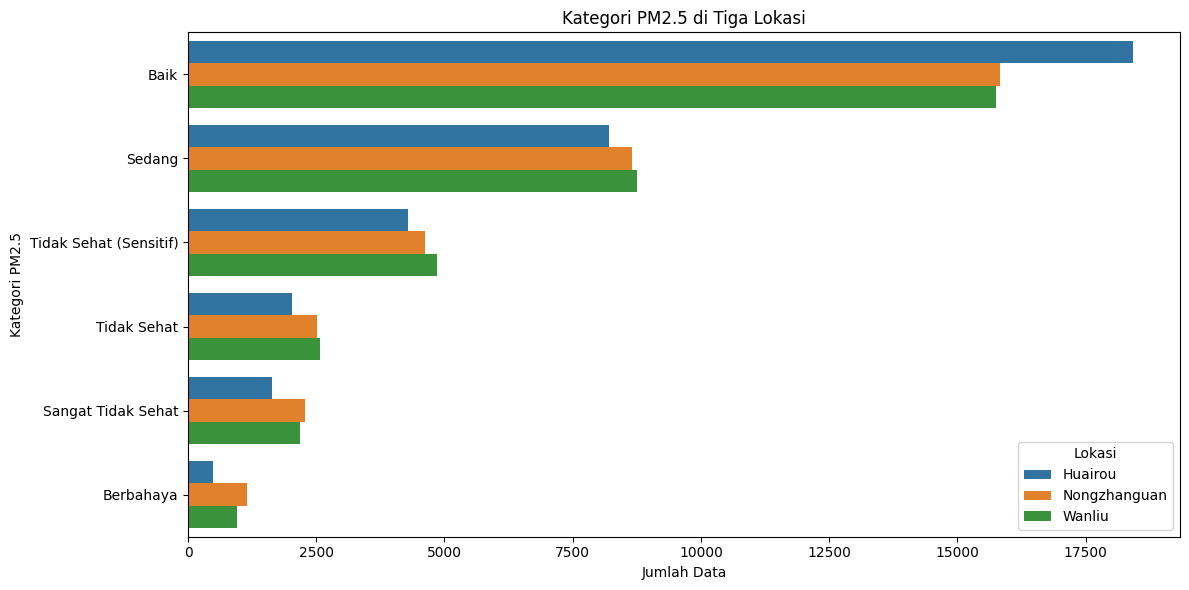

In [50]:
# Definisi kategori kualitas udara berdasarkan PM2.5
bins = [0, 50, 100, 150, 200, 300, float('inf')]
labels = ["Baik", "Sedang", "Tidak Sehat (Sensitif)", "Tidak Sehat", "Sangat Tidak Sehat", "Berbahaya"]

# Menambahkan kategori ke dataset
df["PM2.5_Category"] = pd.cut(df["PM2.5"], bins=bins, labels=labels, include_lowest=True)

# Preview jumlah data per kategori untuk setiap lokasi
category_counts = df.groupby("location")["PM2.5_Category"].value_counts().unstack()
print(category_counts)

# Visualisasi distribusi kategori PM2.5
plt.figure(figsize=(12, 6))
sns.countplot(y=df["PM2.5_Category"], order=labels, hue=df["location"])
plt.title("Kategori PM2.5 di Tiga Lokasi")
plt.xlabel("Jumlah Data")
plt.ylabel("Kategori PM2.5")
plt.legend(title="Lokasi")
plt.tight_layout()
plt.show()

**Insight:**
1. Nongzhanguan dan Wanliu memiliki tingkat polusi lebih tinggi dibandingkan Huairou.
  - Kategori "Tidak Sehat", "Sangat Tidak Sehat", dan "Berbahaya" lebih sering terjadi di Nongzhanguan dan Wanliu.
  - Huairou lebih sering berada dalam kategori "Baik" dan "Sedang", menunjukkan kualitas udara yang lebih baik.

2. Mayoritas data berada dalam kategori "Sedang" hingga "Tidak Sehat".
  - Hal ini menunjukkan bahwa kualitas udara di ketiga lokasi cenderung buruk secara keseluruhan.

3. Kasus "Berbahaya" cukup signifikan di lokasi perkotaan.
  - Polusi PM2.5 sangat tinggi di beberapa waktu tertentu di Nongzhanguan dan Wanliu, kemungkinan akibat faktor industri dan transportasi. Huairou lebih sedikit mengalami kejadian polusi ekstrem.
  





## Conclusion

- Conclution pertanyaan 1 : Bagaimana pengaruh musim terhadap tingkat polusi udara di ketiga lokasi?
  - Musim sangat memengaruhi tingkat polusi udara.
  - Musim dingin (Winter) memiliki tingkat polusi udara tertinggi di semua lokasi.
  - Udara lebih bersih selama musim panas, kemungkinan karena sirkulasi udara yang lebih baik,sehingga membantu membersihkan partikel polusi dari atmosfer.
  - Musim memiliki dampak signifikan terhadap tingkat polusi udara. Musim dingin menjadi periode paling berisiko, sementara musim panas cenderung lebih bersih.
- Conclution pertanyaan 2 : Bagaimana hubungan antara parameter cuaca (kelembaban, suhu, dan kecepatan angin) dengan tingkat polusi udara?
  - Suhu (TEMP) memiliki korelasi negatif dengan PM2.5.
    - Saat suhu meningkat, tingkat polusi udara (PM2.5) cenderung menurun
  - Kecepatan angin (WSPM) memiliki korelasi negatif dengan PM2.5.
    - Kecepatan angin yang lebih tinggi membantu mengurangi polusi.
  - Kelembaban (DEWP) memiliki korelasi positif dengan PM2.5
    - Udara yang lebih lembap cenderung meningkatkan kondensasi partikel polutan, menyebabkan polusi lebih tinggi.
  - Faktor cuaca memiliki dampak langsung terhadap polusi udara. Suhu tinggi dan angin kencang membantu mengurangi polusi, sementara kelembaban tinggi cenderung memperburuknya.

- Saran yang dapat diberikan :
  - Penghijauan perkotaan dapat membantu meningkatkan aliran udara dan mengurangi polusi udara di daerah dengan kecepatan angin rendah.
  - Teknologi pemantauan kelembaban udara dapat digunakan untuk memperkirakan lonjakan polusi dan mengambil tindakan pencegahan lebih awal.
  - Peningkatan pengawasan kualitas udara di musim dingin, terutama di Nongzhanguan dan Wanliu. Dengan mengurangi penggunaan pemanas berbahan bakar fosil untuk transisi ke energi yang lebih ramah lingkungan.


